<a href="https://colab.research.google.com/github/Bytebandit-011/Stock-Price-Prediction/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [48]:
data = yf.download("AAPL", start="2018-01-01", end="2023-01-01")
data = data[["Close"]]  # Only use closing price
data["Target"] = data["Close"].shift(-1)  # Next day's price

/tmp/ipython-input-48-1961624612.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


In [49]:
data

Price,Close,Target
Ticker,AAPL,
Date,,
2018-01-02,40.426830,40.419773
2018-01-03,40.419773,40.607529
2018-01-04,40.607529,41.069862
2018-01-05,41.069862,40.917309
2018-01-08,40.917309,40.912624
...,...,...
2022-12-23,130.173782,128.367172
2022-12-27,128.367172,124.428207


In [50]:
data.dropna(inplace=True)
X = data[["Close"]]
y = data["Target"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
predictions = model.predict(X_test)

In [57]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

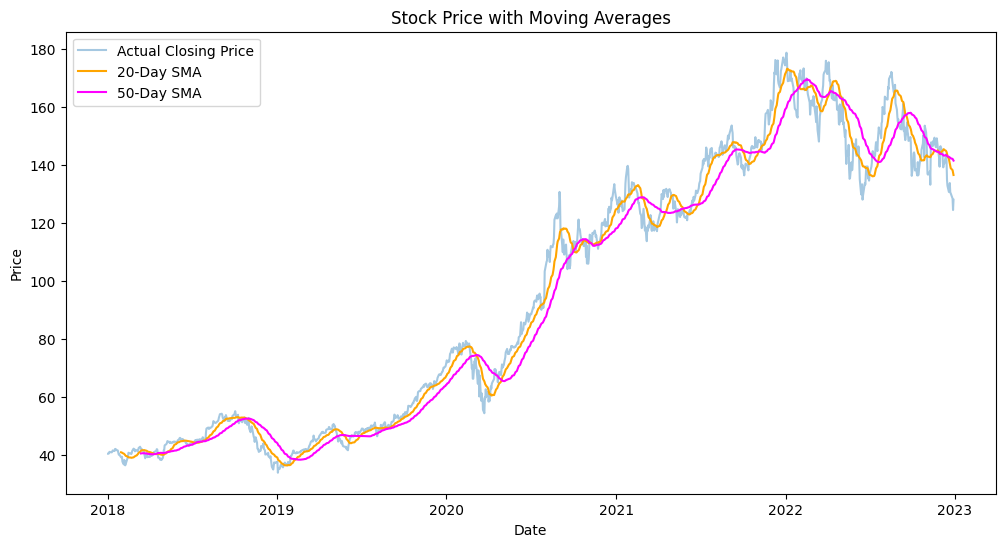

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Closing Price', alpha=0.4)
plt.plot(data['SMA_20'], label='20-Day SMA', color='orange')
plt.plot(data['SMA_50'], label='50-Day SMA', color='magenta')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

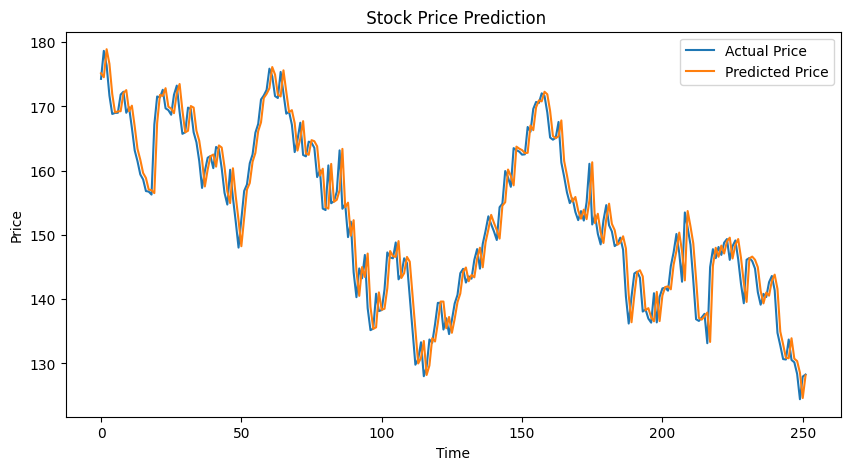

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.title(" Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [55]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 11.400871255445484
